## Fetch data

### Imports

In [378]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 64.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.7 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 59.8 MB/s eta 0:00:0000:

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import arff, numpy as np
import math
import pandas as pd
import matplotlib 
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap

### Read data

In [207]:
dataset = pd.read_csv('csvtecator_simplified_header.csv')
dataset.info()
dataset.head(240)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 126 entries, id to protein
dtypes: float64(125), int64(1)
memory usage: 236.4 KB


,id,_1,_2,_3,_4,_5,_6,_7,_8,_9,...,principal_component_16,principal_component_17,principal_component_18,principal_component_19,principal_component_20,principal_component_21,principal_component_22,moisture,fat,protein
0,1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,...,0.233876,0.899661,-0.042006,0.708717,-0.254173,-0.391579,-0.419313,60.5,22.5,16.7
1,2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,...,-0.195980,-0.046359,-0.634996,-0.354403,0.014650,0.269542,0.096692,46.0,40.1,13.5
2,3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,...,0.795466,0.762246,-1.268580,0.690588,-0.785592,-0.671237,-0.710290,71.0,8.4,20.5
3,4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,...,0.616500,-0.388684,-2.068390,1.276160,-0.259437,-0.140206,-0.165963,72.8,5.9,20.7
4,5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,...,-1.095540,-1.348450,0.453559,0.402624,0.031307,0.021824,0.145777,58.3,25.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,3.22518,3.23016,3.23505,3.23988,3.24476,3.24971,3.25472,3.25980,3.26498,...,-0.897510,-1.094940,-0.047774,-1.072080,0.683963,0.743673,0.824097,70.0,6.6,23.2
236,237,3.30792,3.31259,3.31733,3.32205,3.32683,3.33169,3.33663,3.34170,3.34700,...,-1.033330,-1.196250,0.991593,-0.987896,0.813800,0.919915,0.950013,69.7,7.1,23.2
237,238,2.66103,2.66344,2.66582,2.66820,2.67065,2.67321,2.67588,2.67864,2.68160,...,0.413767,0.500473,-0.232210,0.160583,-0.456995,-0.425684,-0.438117,69.1,7.7,22.9
238,239,3.02438,3.02997,3.03550,3.04102,3.04653,3.05209,3.05769,3.06330,3.06903,...,-0.250646,-0.298301,-0.223632,-0.436276,0.372878,0.288446,0.383060,66.3,10.4,22.4


### Create test and train sets

In [208]:
train_pc = dataset[0:172]
test_pc = dataset[172:215]
test_extrapolated_pc = dataset[215:240]

print('length train = ', len(train_pc), ' length test = ', len(test_pc), 
      ' length extrapolated = ', len(test_extrapolated_pc))

length train =  172  length test =  43  length extrapolated =  25


## Take a look at data

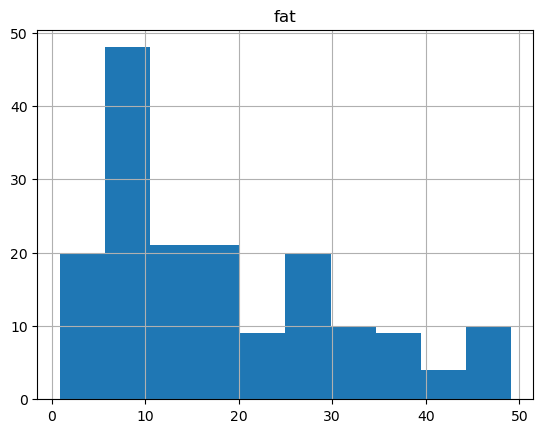

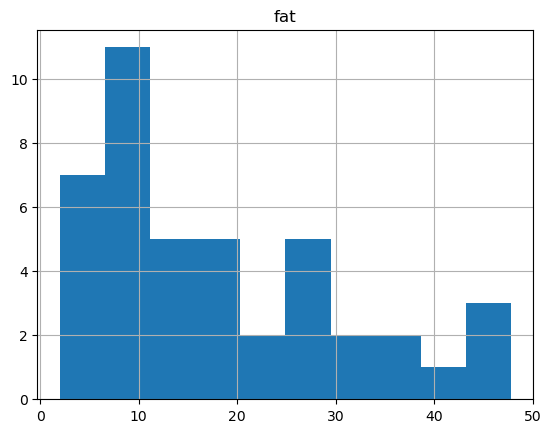

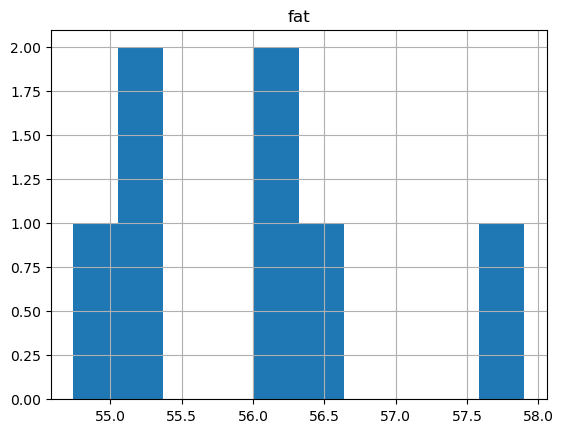

In [209]:
# check target distribution - train
train_pc.hist(column='fat');
# check target distribution - test
test_pc.hist(column='fat');
# check target distribution - extrapolated
test_extrapolated_pc[0:7].hist(column='fat');

Frequency of tot > 100 =  0.13953488372093023 172


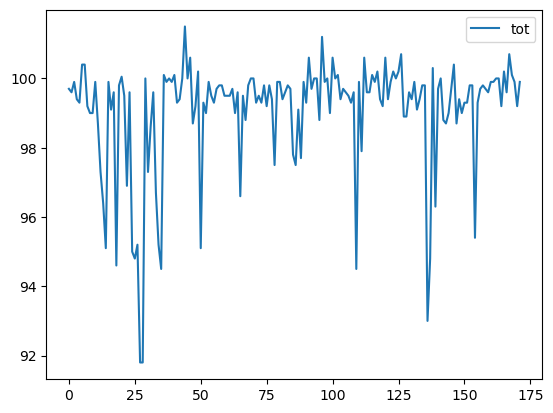

In [210]:
# Are meat components in %?
sum_components = train_pc['fat'] + train_pc['protein'] + train_pc['moisture']
s_c = sum_components.to_frame(name = 'tot')

s_c.plot()

print('Frequency of tot > 100 = ',sum(s_c.tot>100)/len(s_c.tot), len(s_c.tot))


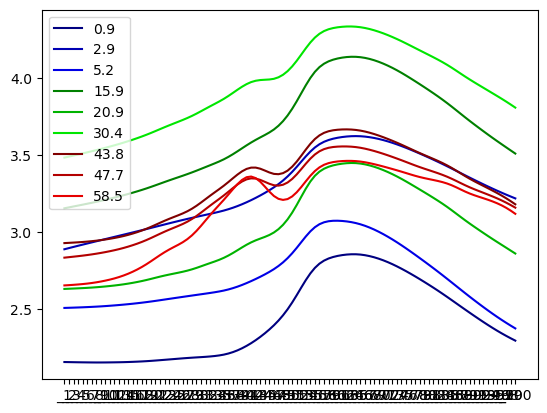

In [211]:
# Reconstruct some spectra
#Low fat - < 10
low_fat = dataset[11:12]
low_fat_spectrum = low_fat.iloc[:,1:101]
low_fat2 = dataset[12:13]
low_fat_spectrum2 = low_fat2.iloc[:,1:101]
low_fat3 = dataset[15:16]
low_fat_spectrum3 = low_fat3.iloc[:,1:101]


#Medium fat - 10 - 30
medium_fat = dataset[159:160]
medium_fat_spectrum = medium_fat.iloc[:,1:101]
medium_fat2 = dataset[31:32]
medium_fat_spectrum2 = medium_fat2.iloc[:,1:101]
medium_fat3 = dataset[37:38]
medium_fat_spectrum3 = medium_fat3.iloc[:,1:101]


#High fat - 43 - 58.5
high_fat = dataset[41:42]
high_fat_spectrum = high_fat.iloc[:,1:101]
high_fat2 = dataset[172:173]
high_fat_spectrum2 = high_fat2.iloc[:,1:101]
high_fat3 = dataset[222:223]
high_fat_spectrum3 = high_fat3.iloc[:,1:101]

# ---------------

#Plotting
plt.plot(low_fat_spectrum.T, c=(0, 0, 0.5), label= low_fat.fat.values[0])
plt.plot(low_fat_spectrum2.T, c=(0, 0, 0.7), label= low_fat2.fat.values[0])
plt.plot(low_fat_spectrum3.T, c=(0, 0, 0.9), label= low_fat3.fat.values[0])

plt.plot(medium_fat_spectrum.T, c=(0, 0.5, 0), label=medium_fat.fat.values[0])
plt.plot(medium_fat_spectrum2.T, c=(0, 0.7, 0), label=medium_fat2.fat.values[0])
plt.plot(medium_fat_spectrum3.T, c=(0, 0.9, 0), label=medium_fat3.fat.values[0])

plt.plot(high_fat_spectrum.T,  c=(0.5, 0, 0), label=high_fat.fat.values[0])
plt.plot(high_fat_spectrum2.T,  c=(0.7, 0, 0), label=high_fat2.fat.values[0])
plt.plot(high_fat_spectrum3.T,  c=(0.9, 0, 0), label=high_fat3.fat.values[0])

plt.legend()
plt.show()


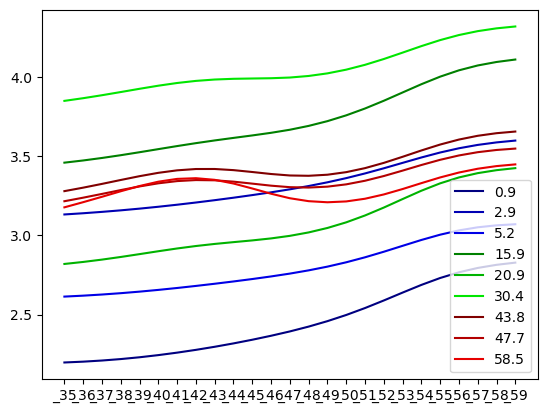

In [212]:
# Focus on peaks
#Low fat - < 10
low_fat = dataset[11:12]
low_fat_spectrum = low_fat.iloc[:,35:60]
low_fat2 = dataset[12:13]
low_fat_spectrum2 = low_fat2.iloc[:,35:60]
low_fat3 = dataset[15:16]
low_fat_spectrum3 = low_fat3.iloc[:,35:60]


#Medium fat - 10 - 30
medium_fat = dataset[159:160]
medium_fat_spectrum = medium_fat.iloc[:,35:60]
medium_fat2 = dataset[31:32]
medium_fat_spectrum2 = medium_fat2.iloc[:,35:60]
medium_fat3 = dataset[37:38]
medium_fat_spectrum3 = medium_fat3.iloc[:,35:60]


#High fat - - 58.5
high_fat = dataset[41:42]
high_fat_spectrum = high_fat.iloc[:,35:60]
high_fat2 = dataset[172:173]
high_fat_spectrum2 = high_fat2.iloc[:,35:60]
high_fat3 = dataset[222:223]
high_fat_spectrum3 = high_fat3.iloc[:,35:60]

# ---------------

#Plotting
plt.plot(low_fat_spectrum.T, c=(0, 0, 0.5), label= low_fat.fat.values[0])
plt.plot(low_fat_spectrum2.T, c=(0, 0, 0.7), label= low_fat2.fat.values[0])
plt.plot(low_fat_spectrum3.T, c=(0, 0, 0.9), label= low_fat3.fat.values[0])

plt.plot(medium_fat_spectrum.T, c=(0, 0.5, 0), label=medium_fat.fat.values[0])
plt.plot(medium_fat_spectrum2.T, c=(0, 0.7, 0), label=medium_fat2.fat.values[0])
plt.plot(medium_fat_spectrum3.T, c=(0, 0.9, 0), label=medium_fat3.fat.values[0])

plt.plot(high_fat_spectrum.T,  c=(0.5, 0, 0), label=high_fat.fat.values[0])
plt.plot(high_fat_spectrum2.T,  c=(0.7, 0, 0), label=high_fat2.fat.values[0])
plt.plot(high_fat_spectrum3.T,  c=(0.9, 0, 0), label=high_fat3.fat.values[0])

plt.legend()
plt.show()

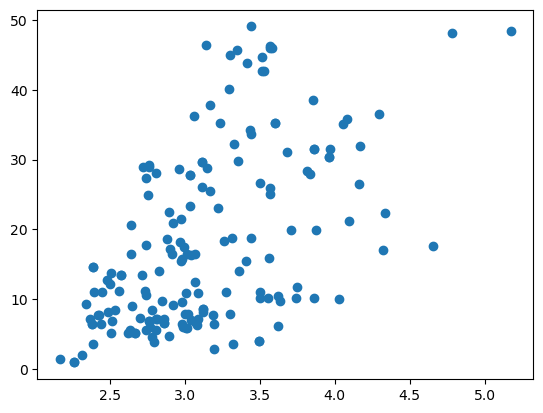

/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/3998589492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc['43_50'] = train_pc['_43'] -  train_pc['_50']
/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/3998589492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc['_43_smooth'] = (train_pc['_42'] +  train_pc['_43'] +  train_pc['_44'])/3
/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/3998589492.py:11: SettingWithCopyWarning: 
A value i

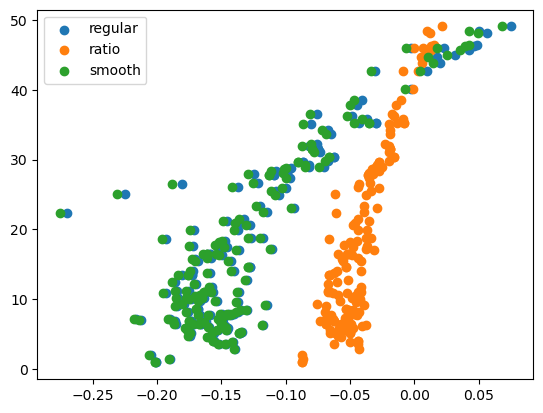

In [344]:
#max linear corr channel
plt.scatter(train_pc['_41'], train_pc['fat'])
plt.show()

#peak detector
train_pc['43_50'] = train_pc['_43'] -  train_pc['_50']
plt.scatter(train_pc['43_50'], train_pc['fat'], label = 'regular')

#peak smoother
train_pc['_43_smooth'] = (train_pc['_42'] +  train_pc['_43'] +  train_pc['_44'])/3
train_pc['_50_smooth'] = (train_pc['_49'] +  train_pc['_50'] +  train_pc['_51'])/3

#peak ratio
train_pc['43_50_ratio'] = (train_pc['_43'] -  train_pc['_50'])/train_pc['_43']
plt.scatter(train_pc['43_50_ratio'], train_pc['fat'], label = 'ratio')

train_pc['43_50_smooth'] = train_pc['_43_smooth'] -  train_pc['_50_smooth']
plt.scatter(train_pc['43_50_smooth'], train_pc['fat'], label = 'smooth')
plt.legend()

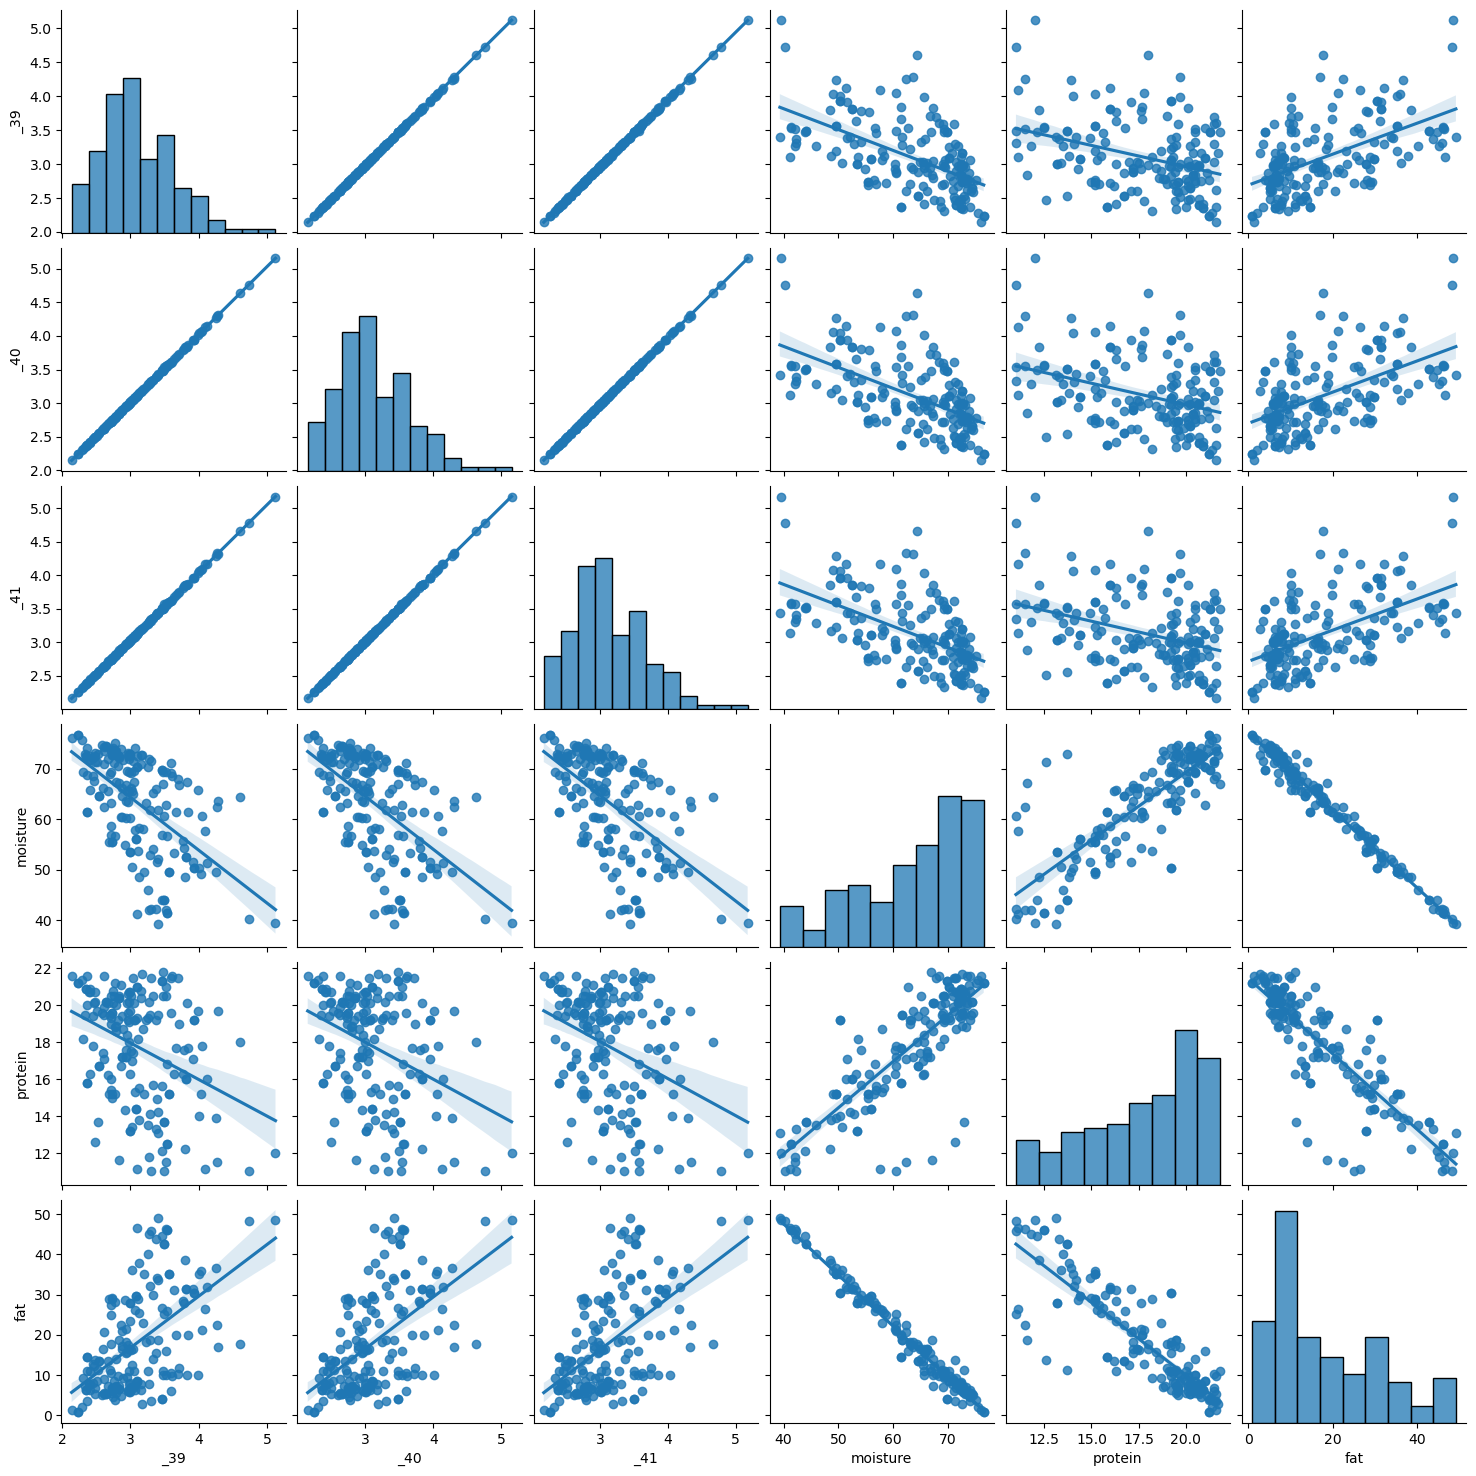

In [214]:
sn.pairplot(train_pc, vars=['_39', '_40', '_41'
                                ,'moisture', 'protein', 'fat'], kind='reg') 

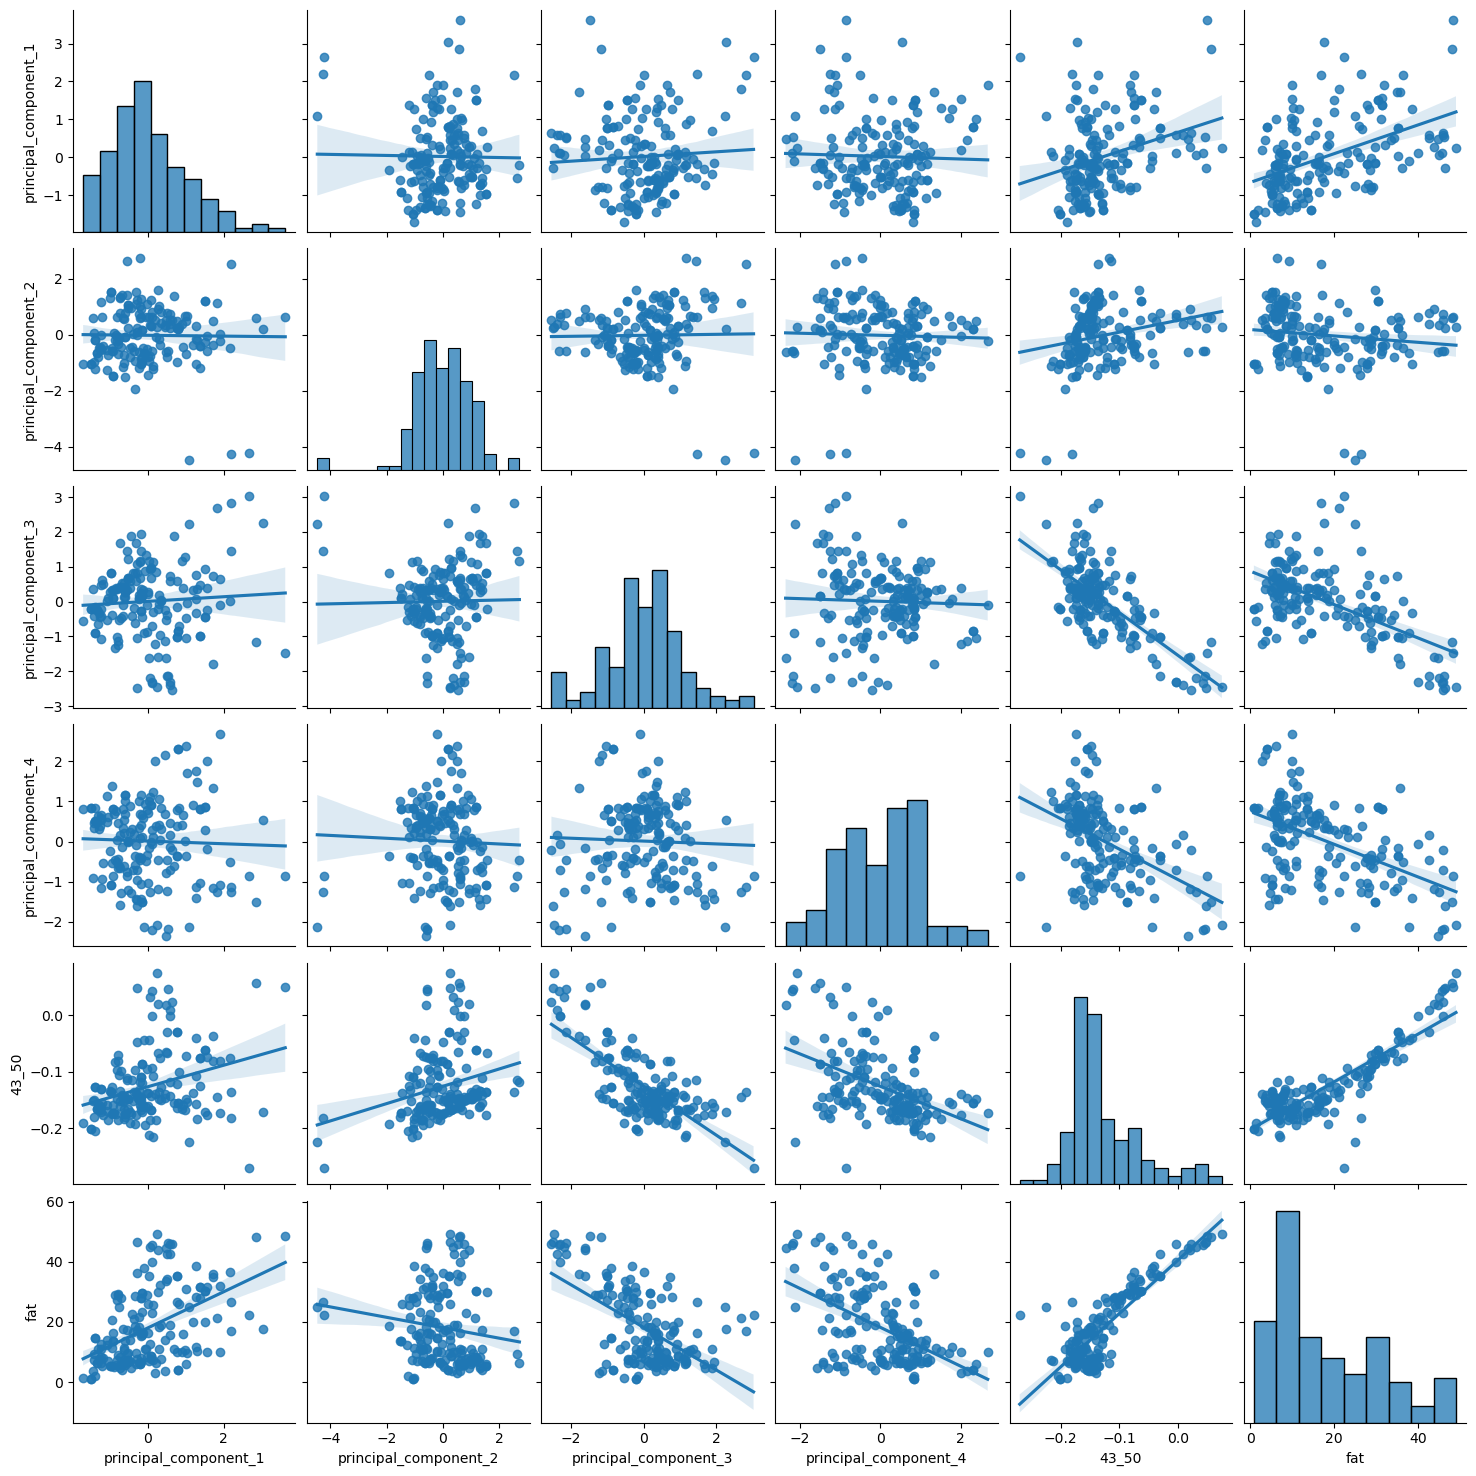

In [215]:
sn.pairplot(train_pc, vars=['principal_component_1', 'principal_component_2', 'principal_component_3'
                                ,'principal_component_4', '43_50', 'fat'], kind='reg') 

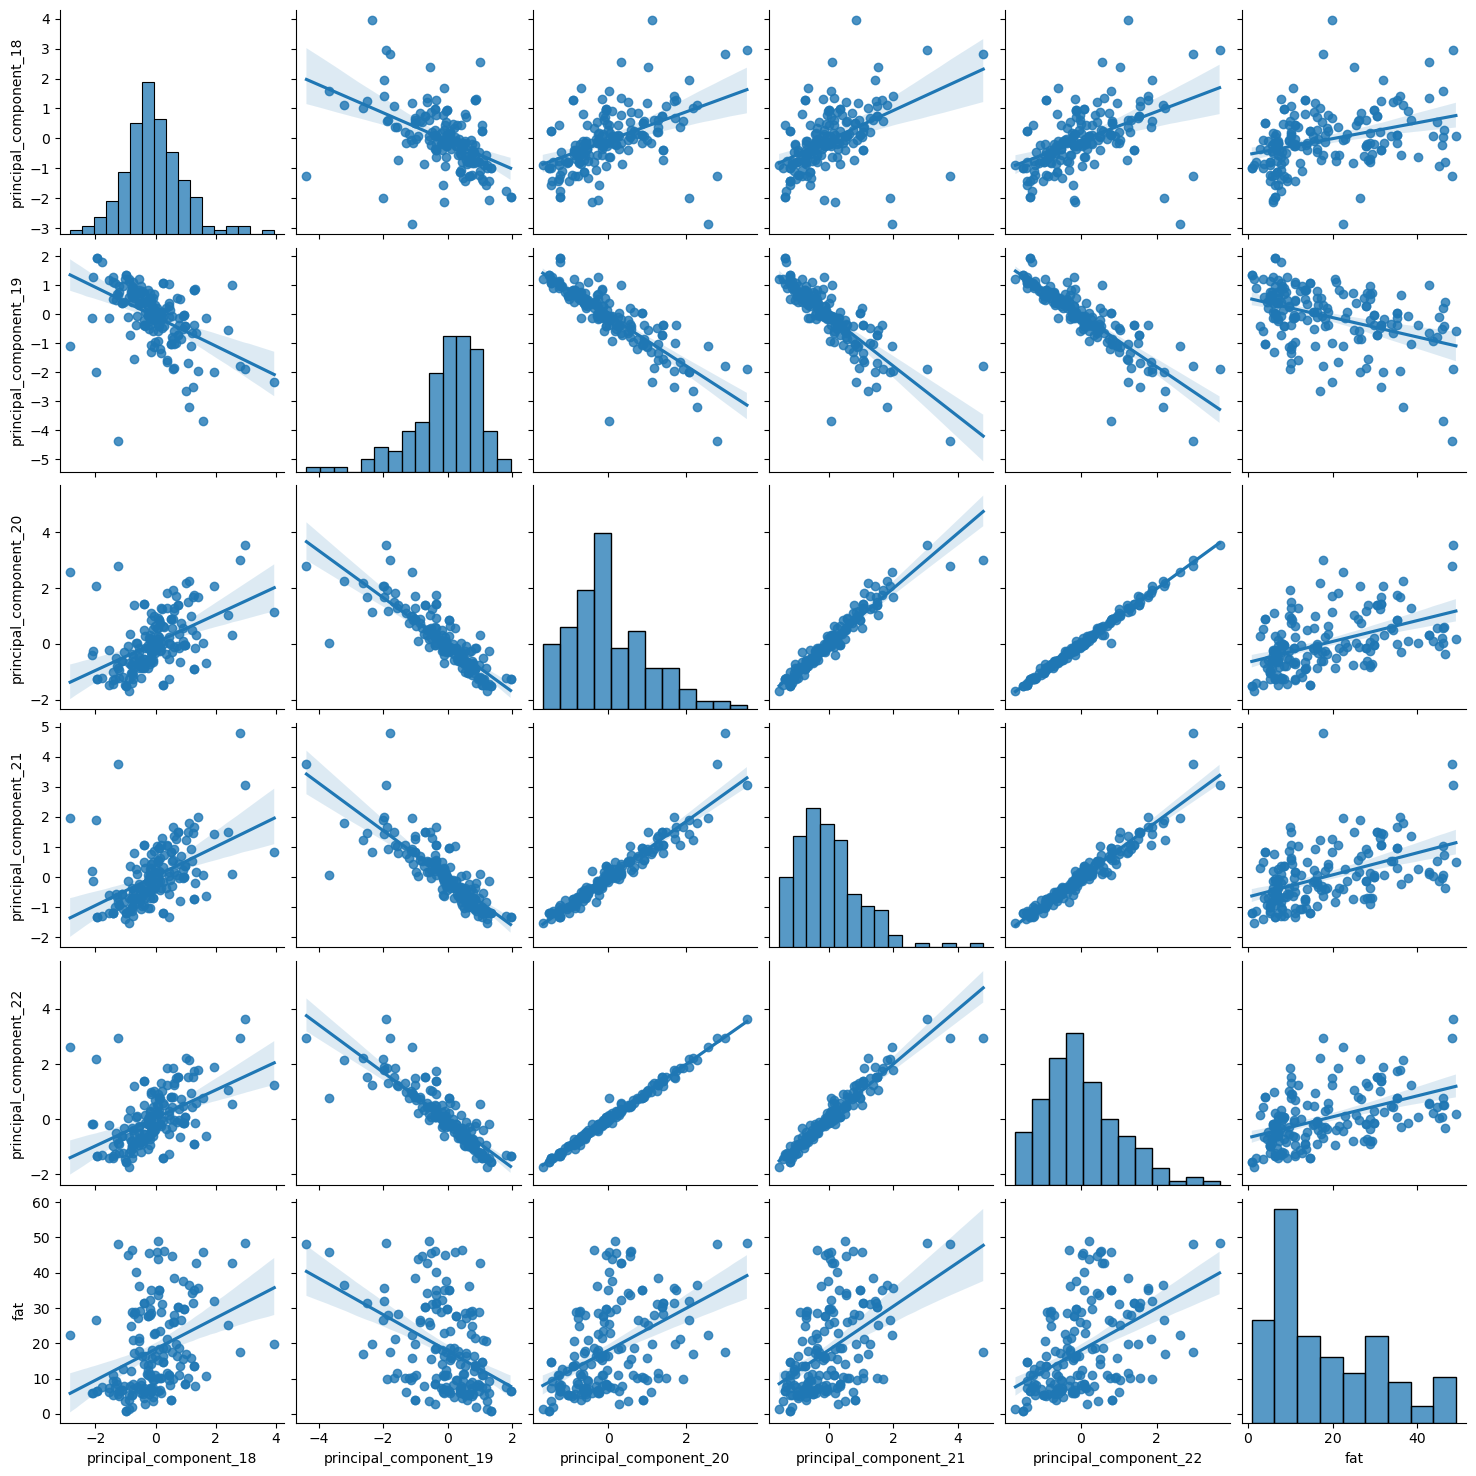

In [216]:
sn.pairplot(train_pc, vars=['principal_component_18', 'principal_component_19', 'principal_component_20'
                                ,'principal_component_21', 'principal_component_22', 'fat'], kind='reg') 

In [343]:
corr_matrix = train_pc.corr()
corr_matrix.fat.to_csv('correlation_matrix_fat.csv')
corr_matrix.to_csv('correlation_matrix_all.csv')

# Modelling

In [218]:
# Eval function

def SEP(real_y, pred_y):
    error = math.sqrt(mean_squared_error(real_y,pred_y))
    print(error)

## Linear regressions

### Linear regression - Peak detector


regr. score =  0.7497727650731423
result SEP = 
5.223279847370223


/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/3751849582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pc['43_50_ratio'] = (test_pc['_43'] -  test_pc['_50'])/test_pc['_43']
/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/3751849582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pc['43_50'] = test_pc['_43'] -  test_pc['_50']


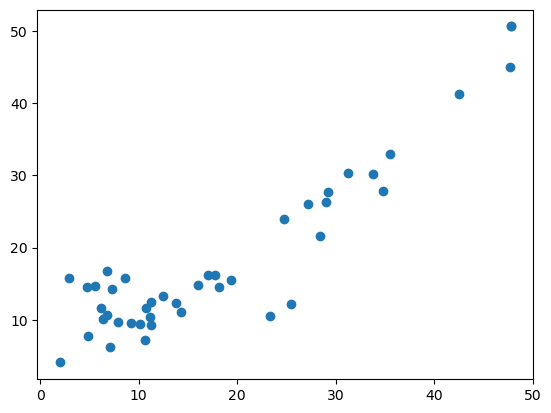

In [350]:
# Add peak detector to test data
test_pc['43_50_ratio'] = (test_pc['_43'] -  test_pc['_50'])/test_pc['_43']
test_pc['43_50'] = test_pc['_43'] -  test_pc['_50']


X = train_pc[['43_50']]#.to_numpy().reshape(-1, 1) 
Y = train_pc[['fat']]
reg = LinearRegression().fit(X,Y)
print('regr. score = ', reg.score(X,Y))


X_test = test_pc[['43_50']]
Y_test = test_pc[['fat']]

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Linear regression - Best PC

regr. score =  0.34008380034474817
result SEP = 
10.732047598394454


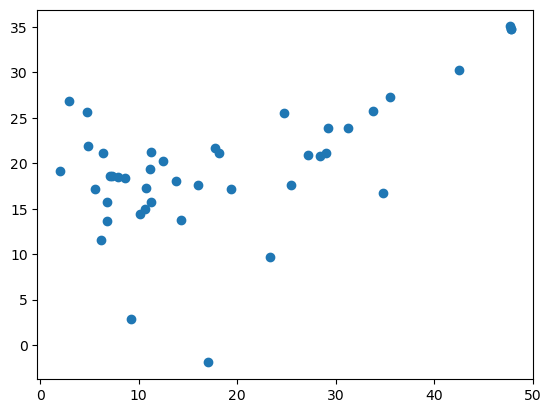

In [243]:
X = train_pc[['principal_component_3']]
Y = train_pc[['fat']]

reg = LinearRegression().fit(X,Y)
print('regr. score = ', reg.score(X,Y))


X_test = test_pc[['principal_component_3']]
Y_test = test_pc[['fat']]

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Linear regression - Best channel

regr. score =  0.29973050624113073
result SEP = 
12.008111992186615


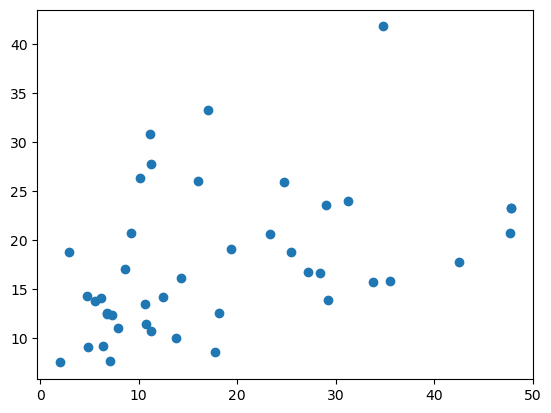

In [244]:
X = train_pc[['_41']]
Y = train_pc[['fat']]

reg = LinearRegression().fit(X,Y)
print('regr. score = ', reg.score(X,Y))


X_test = test_pc[['_41']]
Y_test = test_pc[['fat']]

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Linear regression - All 3 combined

regr. score =  0.7955968940779894
result SEP = 
5.4157313868242225


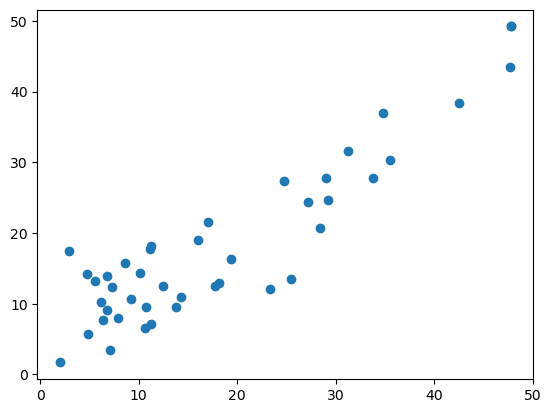

In [352]:
X = train_pc[['_41','43_50','principal_component_3']]
Y = train_pc[['fat']]

reg = LinearRegression().fit(X,Y)
print('regr. score = ', reg.score(X,Y))


X_test = test_pc[['_41','43_50','principal_component_3']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Linear regression - multiple PC

regr. score =  0.9601298414509136
result SEP = 
2.595155929751851


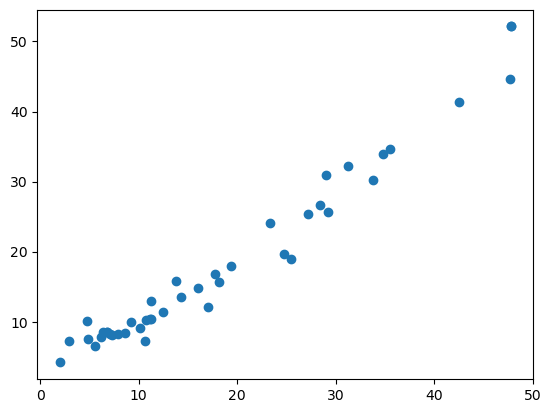

In [256]:
X = train_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12']]
Y = train_pc[['fat']]

reg = LinearRegression().fit(X,Y)
print('regr. score = ', reg.score(X,Y))


X_test = test_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Linear regression - multiple PC + 2 main features <-- Best

regr. score =  0.9744392259099134
result SEP = 
2.1342398671345433


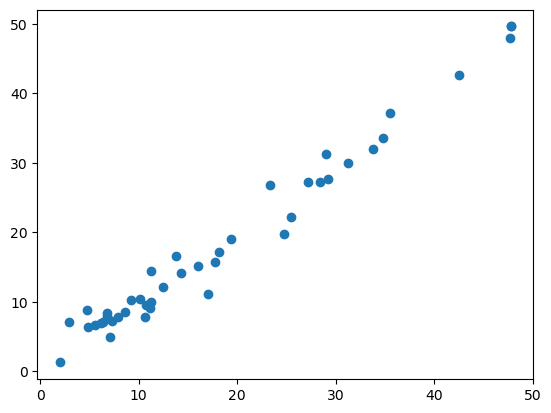

In [373]:
X = train_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12'
             ,'_41'
             ,'43_50'
             ,'43_50_ratio'
             ]]
Y = train_pc[['fat']]

reg = LinearRegression().fit(X,Y)
print('regr. score = ', reg.score(X,Y))


X_test = test_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12'
             ,'_41'
             ,'43_50'
             ,'43_50_ratio'
                 ]]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

result SEP = 
4.363191553769296


/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/1467278497.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X, Y)


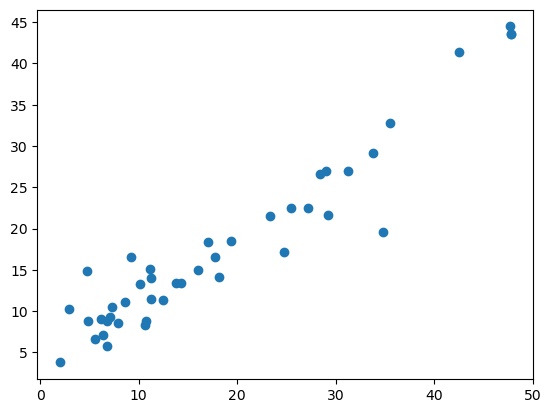

In [376]:
X = train_pc.iloc[:,101:123]
Y = train_pc[['fat']]

reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X, Y)

X_test = test_pc.iloc[:,101:123]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

## Trees


### Main PC

result SEP = 
5.204179894286229


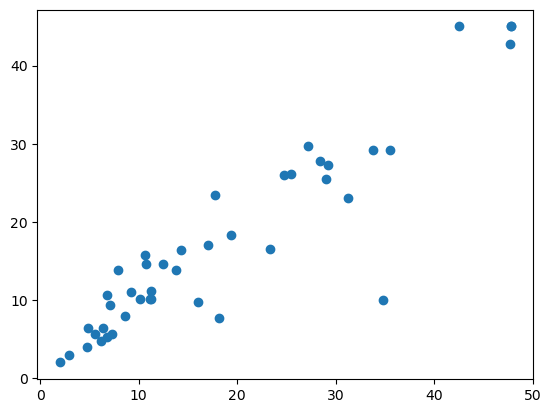

In [325]:
X = train_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12']]
Y = train_pc[['fat']]

reg = DecisionTreeRegressor(max_depth=20)
reg.fit(X, Y)

X_test = test_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### 2 features

result SEP = 
4.91466326729088


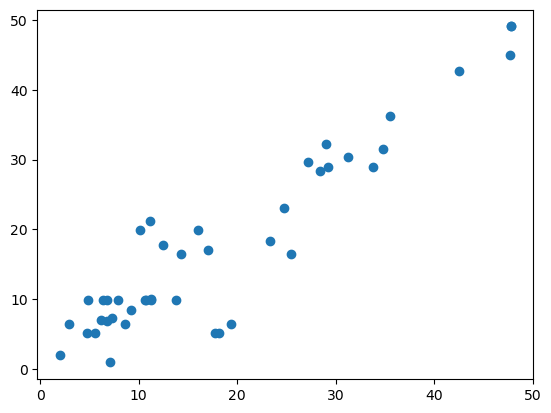

In [299]:
X = train_pc[['_1','43_50']]
Y = train_pc[['fat']]

reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X, Y)

X_test = test_pc[['_1','43_50']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Main PC + 2 features

result SEP = 
3.002531788742154


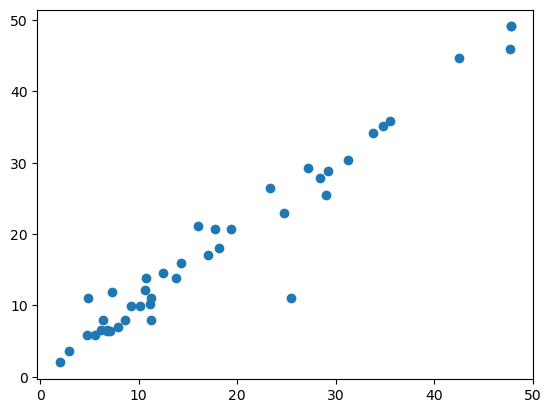

In [354]:
X = train_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12'
             ,'_1','43_50','43_50_ratio']]
Y = train_pc[['fat']]

reg = DecisionTreeRegressor(max_depth=9)
reg.fit(X, Y)

X_test = test_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12'
             ,'_1','43_50','43_50_ratio']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

## Random forest

### Main PC

/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/708841909.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X, Y)


result SEP = 
4.366238605694888


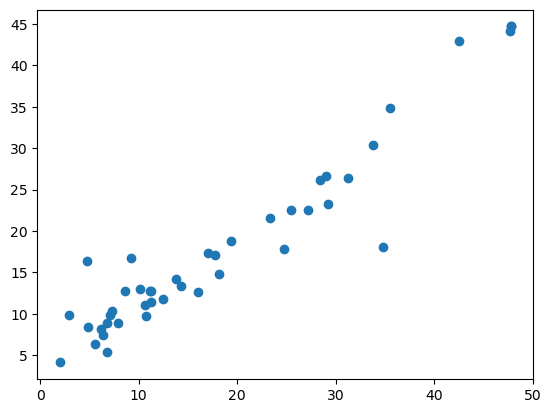

In [311]:
X = train_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12']]
Y = train_pc[['fat']]

reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
reg.fit(X, Y)

X_test = test_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/1686582537.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X, Y)


result SEP = 
4.475757142963724


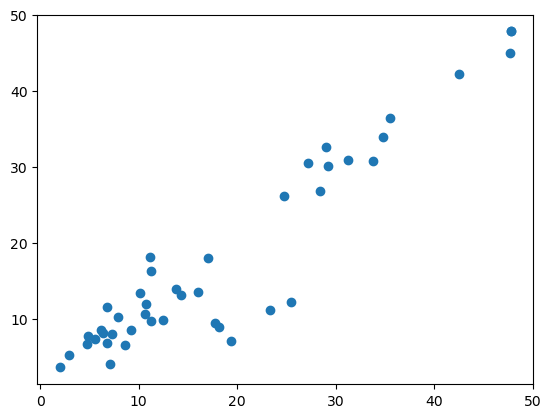

In [312]:
X = train_pc[['_1','43_50']]
Y = train_pc[['fat']]

reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
reg.fit(X, Y)

X_test = test_pc[['_1','43_50']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Main PC + 2 features

/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/4046122647.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X, Y)


result SEP = 
2.256779091516719


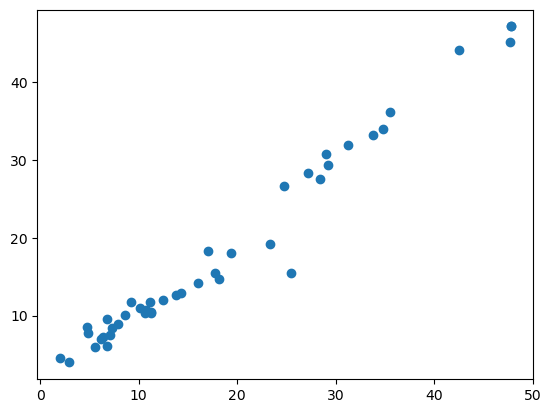

In [374]:
X = train_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12'
             ,'_1'
             ,'43_50'
             ,'43_50_ratio']]
Y = train_pc[['fat']]

reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
reg.fit(X, Y)

X_test = test_pc[['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'
             ,'principal_component_6','principal_component_7','principal_component_8','principal_component_9','principal_component_10'
             ,'principal_component_11','principal_component_12'
             ,'_1'
             ,'43_50'
             ,'43_50_ratio']]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)

### Just everybody - channels

/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/3597832428.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X, Y)


result SEP = 
7.600856198711328


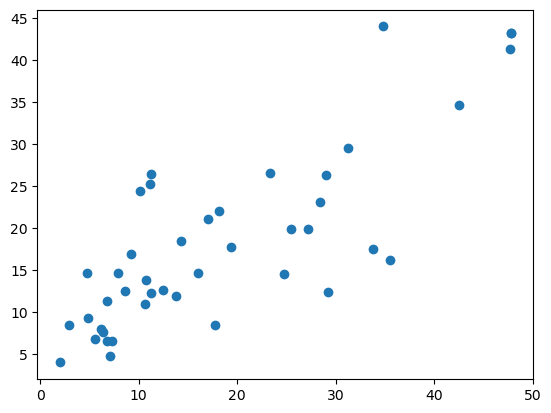

In [375]:
X = train_pc.iloc[:,1:101]
Y = train_pc[['fat']]

reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X, Y)

X_test = test_pc.iloc[:,1:101]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)


### Just everybody - PCA

result SEP = 
4.363191553769296


/var/folders/y2/ks7x_gtj541_fm6dsv5wqcn80000gn/T/ipykernel_44866/1467278497.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X, Y)


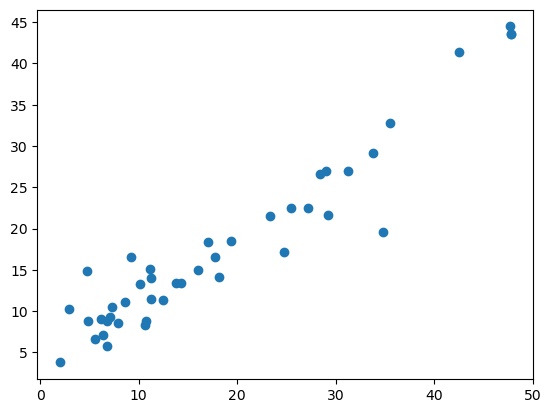

In [371]:
X = train_pc.iloc[:,101:123]
Y = train_pc[['fat']]

reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X, Y)

X_test = test_pc.iloc[:,101:123]
Y_test = test_pc['fat']

Y_pred = reg.predict(X_test)

print('result SEP = ')
SEP(Y_test, Y_pred)

plt.scatter(Y_test, Y_pred)